In [1]:
import pandas as pd
from autogluon.tabular import TabularDataset, TabularPredictor
import pandas as pd
from process_data import DataProcessor

# Loading the data
X_train = pd.read_csv('data/single_turbine_data/X_train.csv')
X_test = pd.read_csv('data/single_turbine_data/X_test.csv')
y_train = pd.read_csv('data/single_turbine_data/y_train.csv')
y_test = pd.read_csv('data/single_turbine_data/y_test.csv')

y_train['# Date and time'] = pd.to_datetime(y_train['# Date and time'])
y_test['# Date and time'] = pd.to_datetime(y_test['# Date and time'])

y_train.set_index('# Date and time', inplace=True)
y_test.set_index('# Date and time', inplace=True)

processor = DataProcessor(X_train)
processor.process_all()
X_train = processor.data

processor = DataProcessor(X_test)
processor.process_all()
X_test = processor.data

original_cols = [
    # '1_Wind direction (°)',
    #    '1_Nacelle position (°)', 
       'avg_dir',
    #    '1_Power (kW)',
    '1_Wind speed (m/s)',
       '1_Front bearing temperature (°C)', '1_Rear bearing temperature (°C)',
    #    '1_Stator temperature 1 (°C)', 
    #    '1_Nacelle ambient temperature (°C)',
       '1_Nacelle temperature (°C)', 
    #    '1_Transformer temperature (°C)',
    #    '1_Generator bearing rear temperature (°C)',
       '1_Generator bearing front temperature (°C)', 
    #    '1_Temp. top box (°C)',
    #    '1_Hub temperature (°C)', 
       '1_Ambient temperature (converter) (°C)',
       '1_Rotor bearing temp (°C)', 
       '1_Transformer cell temperature (°C)', 
    #    '1_Generator RPM (RPM)',
       ]
leadsnlags = [
       '1_Wind direction (°)_lead6', 
       '1_Nacelle position (°)_lead3',
       '1_Power (kW)_lag6', 
       '1_Stator temperature 1 (°C)_lag1',
       '1_Nacelle ambient temperature (°C)_lead6',
       '1_Transformer temperature (°C)_lead6',
       '1_Generator bearing rear temperature (°C)_lag1',
       '1_Temp. top box (°C)_lag1', 
       '1_Hub temperature (°C)_lead6',
       '1_Ambient temperature (converter) (°C)_lead6',
       '1_Transformer cell temperature (°C)_lead6',
       '1_Generator RPM (RPM)_lead6']
extras = [
    # 'curtailed', 
    'offline',
    'historic_offline',
    ]

mean = [col for col in X_train.columns if 'mean' in col]
std = [col for col in X_train.columns if 'std' in col]
crest = [col for col in X_train.columns if 'crest' in col]
# kurt = [col for col in X_train.columns if 'kurt' in col]
change = [col for col in X_train.columns if 'change' in col]

cols = original_cols + extras + leadsnlags + mean + std + crest
X_train = X_train[cols]
X_test = X_test[cols]

train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

all_data = pd.concat([train_data, test_data], axis=0)

In [2]:
# Assuming 'train_data' and 'test_data' are DataFrames created from the previous response
# Convert the data to AutoGluon's TabularDataset format
train_data = TabularDataset(train_data)
test_data = TabularDataset(test_data)
all_data = TabularDataset(all_data)

# Define the target columns
label = '1_Gear oil temperature (°C)'

# Initialize an empty dictionary to store the predictors
predictors = {}

# Train a separate regression model for each target event type
predictor = TabularPredictor(label=label, 
                              problem_type='regression', 
                              eval_metric='root_mean_squared_error') # regression with R^2 as the evaluation metric
predictor.fit(all_data, 
              # excluded_model_types=['LightGBMLarge'], 
#                   time_limit=600, 
#                   num_bag_sets = 2, 
                  # num_bag_folds = 4,
            #   hyperparameters = 'light',
              presets='best_quality',
              )

No path specified. Models will be saved in: "AutogluonModels/ag-20230923_090217/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
	Consider setting `time_limit` to ensure training finishes within an expected duration or experiment with a small portion of `train_data` to identify an ideal `presets` and `hyperparameters` configuration.
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20230923_090217/"
AutoGluon Version:  0.8.2
Python Version:     3.10.12
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 22.6.0: Wed Jul  5 22:21:53 PDT 2023; root:xnu-8796.141.3~6/RELEASE_ARM64_T6020
Disk Space Avail:   310.88 GB / 1995.22 GB (15.6%)
Train Data Rows:    210937
Train Data Columns: 74
Label Column: 1_Gear oil temperature (°C)
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerato

[1000]	valid_set's rmse: 0.391433
[2000]	valid_set's rmse: 0.349287
[3000]	valid_set's rmse: 0.329539
[4000]	valid_set's rmse: 0.316422
[5000]	valid_set's rmse: 0.307376
[6000]	valid_set's rmse: 0.300787
[7000]	valid_set's rmse: 0.295512
[8000]	valid_set's rmse: 0.290969
[9000]	valid_set's rmse: 0.287138
[10000]	valid_set's rmse: 0.284052
[1000]	valid_set's rmse: 0.397361
[2000]	valid_set's rmse: 0.354755
[3000]	valid_set's rmse: 0.334927
[4000]	valid_set's rmse: 0.321834
[5000]	valid_set's rmse: 0.313041
[6000]	valid_set's rmse: 0.306374
[7000]	valid_set's rmse: 0.301092
[8000]	valid_set's rmse: 0.296891
[9000]	valid_set's rmse: 0.293371
[10000]	valid_set's rmse: 0.290315
[1000]	valid_set's rmse: 0.397034
[2000]	valid_set's rmse: 0.352349
[3000]	valid_set's rmse: 0.331165
[4000]	valid_set's rmse: 0.317963
[5000]	valid_set's rmse: 0.308654
[6000]	valid_set's rmse: 0.301676
[7000]	valid_set's rmse: 0.296
[8000]	valid_set's rmse: 0.291297
[9000]	valid_set's rmse: 0.287387
[10000]	valid_s

	-0.2855	 = Validation score   (-root_mean_squared_error)
	813.79s	 = Training   runtime
	15.71s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ...
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy


[1000]	valid_set's rmse: 0.362125
[2000]	valid_set's rmse: 0.326715
[3000]	valid_set's rmse: 0.310098
[4000]	valid_set's rmse: 0.299572
[5000]	valid_set's rmse: 0.29227
[6000]	valid_set's rmse: 0.287105
[7000]	valid_set's rmse: 0.283141
[8000]	valid_set's rmse: 0.280019
[9000]	valid_set's rmse: 0.277601
[10000]	valid_set's rmse: 0.275615
[1000]	valid_set's rmse: 0.361362
[2000]	valid_set's rmse: 0.325651
[3000]	valid_set's rmse: 0.308744
[4000]	valid_set's rmse: 0.29822
[5000]	valid_set's rmse: 0.290877
[6000]	valid_set's rmse: 0.285375
[7000]	valid_set's rmse: 0.281299
[8000]	valid_set's rmse: 0.278311
[9000]	valid_set's rmse: 0.275752
[10000]	valid_set's rmse: 0.27371
[1000]	valid_set's rmse: 0.360582
[2000]	valid_set's rmse: 0.325007
[3000]	valid_set's rmse: 0.30825
[4000]	valid_set's rmse: 0.297963
[5000]	valid_set's rmse: 0.290937
[6000]	valid_set's rmse: 0.285792
[7000]	valid_set's rmse: 0.281772
[8000]	valid_set's rmse: 0.278604
[9000]	valid_set's rmse: 0.276127
[10000]	valid_se

	-0.275	 = Validation score   (-root_mean_squared_error)
	794.08s	 = Training   runtime
	14.32s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L1 ...
	-0.4031	 = Validation score   (-root_mean_squared_error)
	354.38s	 = Training   runtime
	5.41s	 = Validation runtime
Fitting model: CatBoost_BAG_L1 ...
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-0.2771	 = Validation score   (-root_mean_squared_error)
	816.63s	 = Training   runtime
	0.34s	 = Validation runtime
Fitting model: ExtraTreesMSE_BAG_L1 ...
	-0.3975	 = Validation score   (-root_mean_squared_error)
	39.14s	 = Training   runtime
	5.07s	 = Validation runtime
Fitting model: NeuralNetFastAI_BAG_L1 ...
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-0.358	 = Validation score   (-root_mean_squared_error)
	2930.93s	 = Training   runtime
	3.8s	 = Validation runtime
Fitting model: XGBoost_BAG_L1 ...
	Fitting 8 child models (S1F1 - S1F8) | Fit

[1000]	valid_set's rmse: 0.31483
[2000]	valid_set's rmse: 0.292546
[3000]	valid_set's rmse: 0.282902
[4000]	valid_set's rmse: 0.277691
[5000]	valid_set's rmse: 0.274421
[6000]	valid_set's rmse: 0.272182
[7000]	valid_set's rmse: 0.270596
[8000]	valid_set's rmse: 0.269408
[9000]	valid_set's rmse: 0.268532
[10000]	valid_set's rmse: 0.267872
[1000]	valid_set's rmse: 0.310949
[2000]	valid_set's rmse: 0.287309
[3000]	valid_set's rmse: 0.277572
[4000]	valid_set's rmse: 0.272175
[5000]	valid_set's rmse: 0.268734
[6000]	valid_set's rmse: 0.266488
[7000]	valid_set's rmse: 0.264906
[8000]	valid_set's rmse: 0.263775
[9000]	valid_set's rmse: 0.262941
[10000]	valid_set's rmse: 0.262319
[1000]	valid_set's rmse: 0.316147
[2000]	valid_set's rmse: 0.293086
[3000]	valid_set's rmse: 0.283242
[4000]	valid_set's rmse: 0.277873
[5000]	valid_set's rmse: 0.274516
[6000]	valid_set's rmse: 0.27216
[7000]	valid_set's rmse: 0.270531
[8000]	valid_set's rmse: 0.269368
[9000]	valid_set's rmse: 0.268466
[10000]	valid_

	-0.2677	 = Validation score   (-root_mean_squared_error)
	2619.39s	 = Training   runtime
	22.99s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	-0.248	 = Validation score   (-root_mean_squared_error)
	1.16s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting 9 L2 models ...
Fitting model: LightGBMXT_BAG_L2 ...
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy


[1000]	valid_set's rmse: 0.264763
[2000]	valid_set's rmse: 0.258173
[3000]	valid_set's rmse: 0.255349
[4000]	valid_set's rmse: 0.253707
[5000]	valid_set's rmse: 0.252583
[6000]	valid_set's rmse: 0.251488
[7000]	valid_set's rmse: 0.250695
[8000]	valid_set's rmse: 0.25013
[9000]	valid_set's rmse: 0.249517
[10000]	valid_set's rmse: 0.248996
[1000]	valid_set's rmse: 0.26206
[2000]	valid_set's rmse: 0.25552
[3000]	valid_set's rmse: 0.252687
[4000]	valid_set's rmse: 0.251071
[5000]	valid_set's rmse: 0.249881
[6000]	valid_set's rmse: 0.248916
[7000]	valid_set's rmse: 0.248178
[8000]	valid_set's rmse: 0.247564
[9000]	valid_set's rmse: 0.247197
[10000]	valid_set's rmse: 0.246807
[1000]	valid_set's rmse: 0.265653
[2000]	valid_set's rmse: 0.259068
[3000]	valid_set's rmse: 0.256256
[4000]	valid_set's rmse: 0.254625
[5000]	valid_set's rmse: 0.253393
[6000]	valid_set's rmse: 0.252449
[7000]	valid_set's rmse: 0.251698
[8000]	valid_set's rmse: 0.251126
[9000]	valid_set's rmse: 0.250663
[10000]	valid_s

	-0.2478	 = Validation score   (-root_mean_squared_error)
	781.11s	 = Training   runtime
	13.93s	 = Validation runtime
Fitting model: LightGBM_BAG_L2 ...
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy


[1000]	valid_set's rmse: 0.249188
[2000]	valid_set's rmse: 0.24822
[3000]	valid_set's rmse: 0.247176
[4000]	valid_set's rmse: 0.246742
[5000]	valid_set's rmse: 0.246452
[6000]	valid_set's rmse: 0.246297
[7000]	valid_set's rmse: 0.246033
[8000]	valid_set's rmse: 0.24582
[9000]	valid_set's rmse: 0.245629
[10000]	valid_set's rmse: 0.245537
[1000]	valid_set's rmse: 0.247473
[2000]	valid_set's rmse: 0.246369
[3000]	valid_set's rmse: 0.245952
[4000]	valid_set's rmse: 0.245637
[5000]	valid_set's rmse: 0.245388
[6000]	valid_set's rmse: 0.24514
[7000]	valid_set's rmse: 0.245025
[8000]	valid_set's rmse: 0.244824
[9000]	valid_set's rmse: 0.244683
[10000]	valid_set's rmse: 0.244506
[1000]	valid_set's rmse: 0.246901
[2000]	valid_set's rmse: 0.245979
[3000]	valid_set's rmse: 0.245432
[4000]	valid_set's rmse: 0.244993
[5000]	valid_set's rmse: 0.244794
[6000]	valid_set's rmse: 0.24464
[7000]	valid_set's rmse: 0.24439
[8000]	valid_set's rmse: 0.244269
[9000]	valid_set's rmse: 0.244009
[10000]	valid_set

	-0.2447	 = Validation score   (-root_mean_squared_error)
	748.1s	 = Training   runtime
	13.46s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L2 ...
	-0.2452	 = Validation score   (-root_mean_squared_error)
	453.98s	 = Training   runtime
	6.63s	 = Validation runtime
Fitting model: CatBoost_BAG_L2 ...
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-0.2451	 = Validation score   (-root_mean_squared_error)
	848.13s	 = Training   runtime
	0.35s	 = Validation runtime
Fitting model: ExtraTreesMSE_BAG_L2 ...
	-0.2431	 = Validation score   (-root_mean_squared_error)
	49.49s	 = Training   runtime
	6.19s	 = Validation runtime
Fitting model: NeuralNetFastAI_BAG_L2 ...
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
No improvement since epoch 6: early stopping
	-0.2685	 = Validation score   (-root_mean_squared_error)
	2561.51s	 = Training   runtime
	3.54s	 = Validation runtime
Fitting model: XGBoost_BAG_L2 

[1000]	valid_set's rmse: 0.246777
[2000]	valid_set's rmse: 0.245882
[3000]	valid_set's rmse: 0.245283
[4000]	valid_set's rmse: 0.24477
[5000]	valid_set's rmse: 0.244523
[6000]	valid_set's rmse: 0.244384
[7000]	valid_set's rmse: 0.244251
[8000]	valid_set's rmse: 0.244046
[9000]	valid_set's rmse: 0.243929
[10000]	valid_set's rmse: 0.243819
[1000]	valid_set's rmse: 0.245507
[2000]	valid_set's rmse: 0.244161
[3000]	valid_set's rmse: 0.243506
[4000]	valid_set's rmse: 0.243179
[5000]	valid_set's rmse: 0.242968
[6000]	valid_set's rmse: 0.242797
[7000]	valid_set's rmse: 0.242664
[8000]	valid_set's rmse: 0.242594
[9000]	valid_set's rmse: 0.242573
[10000]	valid_set's rmse: 0.242537
[1000]	valid_set's rmse: 0.246303
[2000]	valid_set's rmse: 0.245404
[3000]	valid_set's rmse: 0.244816
[4000]	valid_set's rmse: 0.244557
[5000]	valid_set's rmse: 0.244292
[6000]	valid_set's rmse: 0.244151
[7000]	valid_set's rmse: 0.244072
[8000]	valid_set's rmse: 0.243921
[9000]	valid_set's rmse: 0.243828
[10000]	valid

	-0.2429	 = Validation score   (-root_mean_squared_error)
	2515.37s	 = Training   runtime
	17.62s	 = Validation runtime
Fitting model: WeightedEnsemble_L3 ...
	-0.2362	 = Validation score   (-root_mean_squared_error)
	0.93s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 24408.16s ... Best model: "WeightedEnsemble_L3"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels/ag-20230923_090217/")


In [37]:
result_dict = predictor.evaluate(test_data, model='WeightedEnsemble_L2')
print(result_dict)

Evaluation: root_mean_squared_error on test data: -0.48318334202552815
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -0.48318334202552815,
    "mean_squared_error": -0.2334661420109585,
    "mean_absolute_error": -0.32362283142568204,
    "r2": 0.9916415850836574,
    "pearsonr": 0.9960067922761624,
    "median_absolute_error": -0.22809982299806109
}


{'root_mean_squared_error': -0.48318334202552815, 'mean_squared_error': -0.2334661420109585, 'mean_absolute_error': -0.32362283142568204, 'r2': 0.9916415850836574, 'pearsonr': 0.9960067922761624, 'median_absolute_error': -0.22809982299806109}


In [6]:
data = pd.read_csv('data/evaluation_data/X_single_turbine.csv')

# concat the last 50 rows of all_data to the start of data
data = pd.concat([all_data[-20:], data], axis=0)

processor = DataProcessor(data)
processor.process_all()
data = processor.data
data = data[cols]
data = TabularDataset(data)

# drop the rows again
data = data.iloc[20:]

# load the predictor from the directory
from autogluon.tabular import TabularDataset, TabularPredictor

# predictor = TabularPredictor.load('AutogluonModels/ag-20230911_163031')

results = predictor.predict(data, model='WeightedEnsemble_L3')

/Users/johnny/Library/CloudStorage/OneDrive-Personal/py/RES_hackathons/Temp Sensor/process_data.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['month_cos'] = np.cos(2*np.pi*df.index.month/12)*-1
/Users/johnny/Library/CloudStorage/OneDrive-Personal/py/RES_hackathons/Temp Sensor/process_data.py:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['hour_cos'] = np.cos(2*np.pi*df.index.hour/24)*-1
/Users/johnny/Library/CloudStorage/OneDrive-Personal/py/RES_hackathons/Temp Sensor/process_data.py:34: PerformanceWarning: DataF

0.48658 without folds
0.489 with folds

In [23]:
npres = results.to_numpy().flatten()

In [7]:
# create submission
submission = pd.read_csv('data/evaluation_data/y_template.csv')
submission['1_Gear oil temperature (°C)'] = results.to_numpy().flatten()
submission.to_csv('submission_jhyland_agnew.csv', index=False)

In [9]:
submission.head(-5)

,# Date and time,1_Gear oil temperature (°C)
0,2020-06-16 08:20:00,38.331490
1,2020-06-16 08:30:00,38.167557
2,2020-06-16 08:40:00,37.911144
3,2020-06-16 08:50:00,37.345676
4,2020-06-16 09:00:00,37.183449
...,...,...
51985,2021-06-16 06:50:00,57.073788
51986,2021-06-16 07:00:00,56.149681
51987,2021-06-16 07:10:00,55.505936
51988,2021-06-16 07:20:00,54.755207


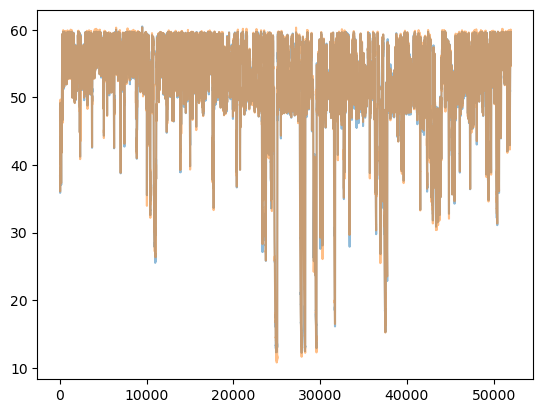

In [8]:
import matplotlib.pyplot as plt

ag = pd.read_csv('submission_jhyland_agnew.csv')
nn = pd.read_csv('submission_jhyland_nn.csv')

plt.plot(range(len(ag)),ag['1_Gear oil temperature (°C)'], alpha=0.5)
plt.plot(range(len(nn)),nn['1_Gear oil temperature (°C)'], alpha=0.5)

In [1]:
import pandas as pd

ag = pd.read_csv('submission_jhyland_ag.csv')
nn = pd.read_csv('submission_jhyland_nn.csv')

# average the two
avg = (ag['1_Gear oil temperature (°C)'] + nn['1_Gear oil temperature (°C)'])/2

submission = pd.read_csv('data/evaluation_data/y_template.csv')
submission['1_Gear oil temperature (°C)'] = avg
submission.to_csv('submission_jhyland_avgnnag.csv', index=False)